### 基于density method 的聚类

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.preprocessing import StandardScaler

def data_load():
  data = np.loadtxt('/Users/wangxiaoxuan/Desktop/human+activity+recognition+using+smartphones/UCI_HAR_Dataset/train/attribute_selection_LinearSVC_x_train.txt', delimiter=None)
  #data = np.loadtxt("/Users/wangxiaoxuan/Desktop/human+activity+recognition+using+smartphones/UCI_HAR_Dataset/train/X_train.txt", delimiter=None)


  # train_vec = np.loadtxt("/Users/wangxiaoxuan/Desktop/human+activity+recognition+using+smartphones/UCI_HAR_Dataset/train/X_train.txt", delimiter=None)
  # train_subject = np.loadtxt("/Users/wangxiaoxuan/Desktop/human+activity+recognition+using+smartphones/UCI_HAR_Dataset/train/subject_train.txt", delimiter=None)
  # train_subject = train_subject[:, np.newaxis]
  # #print("train_vec:",train_vec)
  # #print("train_subject:",train_subject)
  # x_train_with_subject = pd.concat([pd.DataFrame(train_subject), pd.DataFrame(train_vec)], axis=1)
  # x_train_with_subject = x_train_with_subject.to_numpy()
  # print("x_train_with_subject:",x_train_with_subject)
  # #print(train_vec.shape)

  # # 标准化数据以提高聚类效果
  scaler = StandardScaler()
  data = scaler.fit_transform(data)
  # x_train_with_subject = scaler.fit_transform(x_train_with_subject)
  # return train_vec,x_train_with_subject
  return data



In [2]:
data  = data_load()

### 使用knn为DBSCAN选取eps值

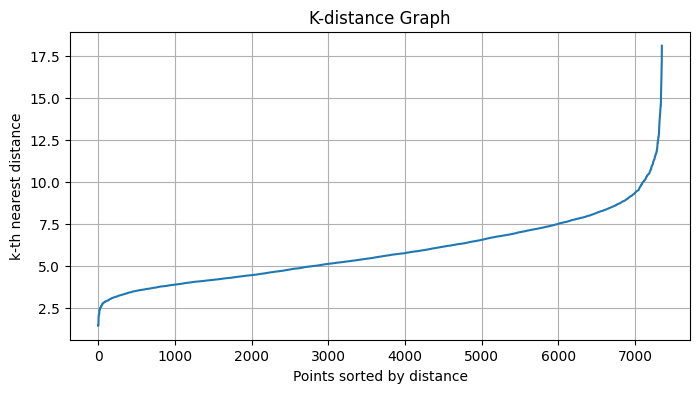

In [20]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# 假设 data_scaled 是已经标准化的数据
neighbors = NearestNeighbors(n_neighbors=2)  # 通常选择2到5之间的值
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)

# 排序距离
distances = np.sort(distances, axis=0)
distances = distances[:, 1]  # 取第二个最近邻的距离

plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title("K-distance Graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("k-th nearest distance")
plt.grid(True)
plt.show()

# 从图中选择一个 "elbow"（弯曲点）

### 按照上面的图最后我选了eps = 8，min_samples就是试了几个数看哪个效果好就设置哪个

### 使用DBSCAN OPTICS进行聚类

DBSCAN 聚类结果:
噪声: 1655个
簇 0: 3627个
簇 1: 1978个
簇 2: 11个
簇 3: 26个
簇 4: 18个
簇 5: 16个
簇 6: 21个
c 聚类结果:
噪声: 7118个
簇 0: 20个
簇 1: 30个
簇 2: 20个
簇 3: 30个
簇 4: 26个
簇 5: 26个
簇 6: 24个
簇 7: 24个
簇 8: 34个
DBSCAN 噪音点数: 1655
OPTICS 噪音点数: 7118


/var/folders/_5/94fjqpyj5nx_b6zfm7yv0x6r0000gn/T/ipykernel_2871/3872941128.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("Spectral", len(unique_labels))


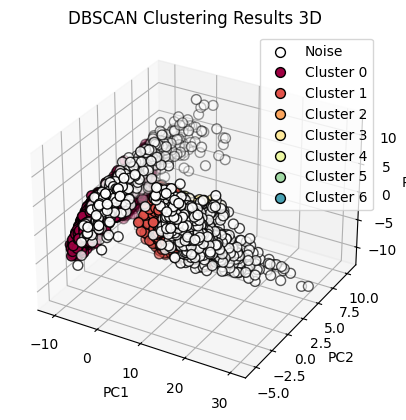

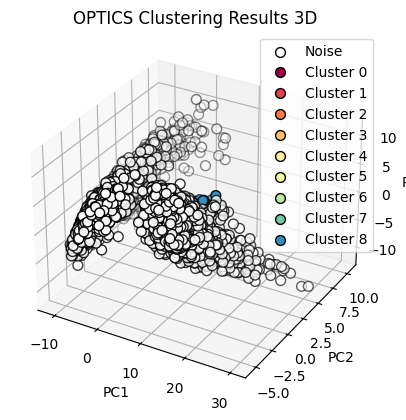

In [21]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, OPTICS
import matplotlib.pyplot as plt


# DBSCAN 聚类
dbscan = DBSCAN(eps=8, min_samples=10)  # 调整这些参数以适应您的数据
dbscan_labels = dbscan.fit_predict(data)

# 分析 DBSCAN 的聚类结果
unique_dbscan, counts_dbscan = np.unique(dbscan_labels, return_counts=True)
print("DBSCAN 聚类结果:")
for label, count in zip(unique_dbscan, counts_dbscan):
    cluster_type = '噪声' if label == -1 else f'簇 {label}'
    print(f"{cluster_type}: {count}个")

# OPTICS 聚类
optics = OPTICS(min_samples=8, xi=0.03, min_cluster_size=20)  # 调整这些参数以适应您的数据
optics_labels = optics.fit_predict(data)

# 分析 OPTICS 的聚类结果
unique_optics, counts_optics = np.unique(optics_labels, return_counts=True)
print("c 聚类结果:")
for label, count in zip(unique_optics, counts_optics):
    cluster_type = '噪声' if label == -1 else f'簇 {label}'
    print(f"{cluster_type}: {count}个")

# 降维以便可视化
pca = PCA(n_components=3)  # 使用 PCA 将数据降维到 2D
x_train_pca = pca.fit_transform(data)

# 计算 DBSCAN 中的噪音点数
dbscan_noise_count = np.sum(dbscan_labels == -1)
print(f"DBSCAN 噪音点数: {dbscan_noise_count}")

# 计算 OPTICS 中的噪音点数
optics_noise_count = np.sum(optics_labels == -1)
print(f"OPTICS 噪音点数: {optics_noise_count}")





# 绘制 DBSCAN 聚类结果
plot_clusters_3d(x_train_pca, dbscan_labels, 'DBSCAN Clustering Results 3D')

# 绘制 OPTICS 聚类结果
plot_clusters_3d(x_train_pca, optics_labels, 'OPTICS Clustering Results 3D')

In [20]:
# 可视化函数
def plot_clusters_3d(data, labels, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    unique_labels = np.unique(labels)
    colors = plt.cm.get_cmap("Spectral", len(unique_labels))
    
    for k in unique_labels:
        color = 'w' if k == -1 else colors(k)
        class_member_mask = (labels == k)
        xyz = data[class_member_mask]
        ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], color=color, edgecolor='k', s=50, label=f'Cluster {k}' if k != -1 else 'Noise')
    
    ax.set_title(title)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.legend()
    plt.show()

### 应用OPTICS画reability plot

Cluster -1: 5002 points
Cluster 0: 1524 points
Cluster 1: 416 points
Cluster 2: 120 points
Cluster 3: 62 points
Cluster 4: 40 points
Cluster 5: 88 points
Cluster 6: 100 points


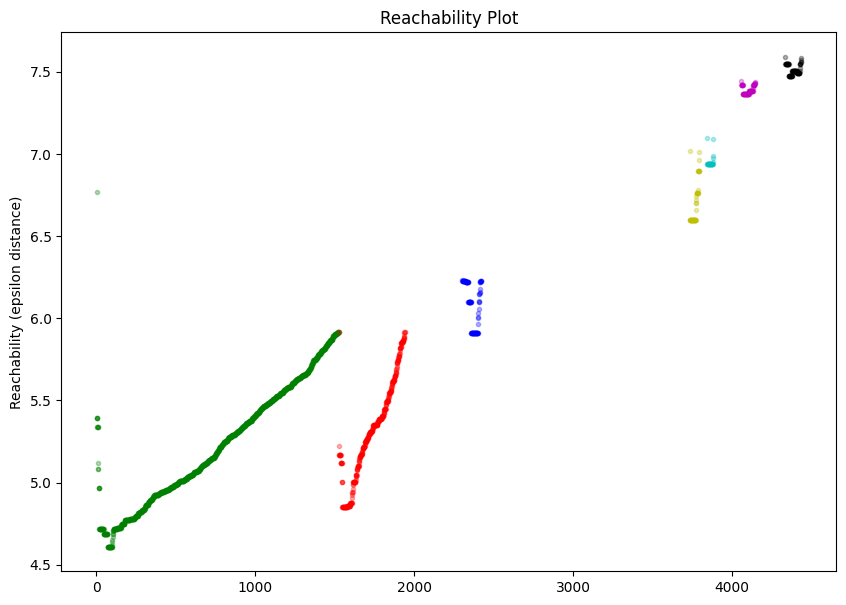

/var/folders/_5/94fjqpyj5nx_b6zfm7yv0x6r0000gn/T/ipykernel_44679/2792591772.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("Spectral", len(unique_labels))


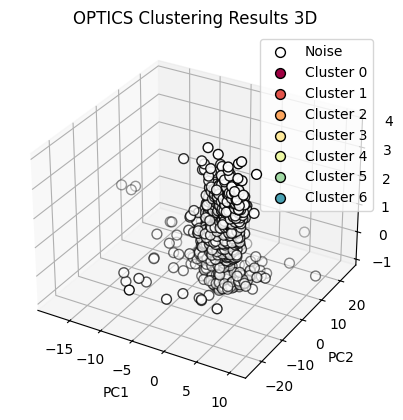

In [21]:
import numpy as np
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# 应用OPTICS算法
optics_model = OPTICS(min_samples=40, xi=.000001, min_cluster_size=40)

# 训练模型
optics_model.fit(data)

# 获取聚类标签
optics_labels = labels = optics_model.labels_

# 计算每个聚类的大小
unique_labels, counts = np.unique(labels, return_counts=True)

# 输出每个聚类的大小
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} points")

# 可达性图
space = np.arange(len(data))
reachability = optics_model.reachability_[optics_model.ordering_]
labels = optics_model.labels_[optics_model.ordering_]

plt.figure(figsize=(10, 7))
colors = ['g.', 'r.', 'b.', 'y.', 'c.', 'm.', 'k.', 'orange.']

for klass, color in zip(range(0, 7), colors):
    if klass != -1:
      Xk = space[labels == klass]
      Rk = reachability[labels == klass]
      plt.plot(Xk, Rk, color, alpha=0.3)
#plt.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
plt.ylabel('Reachability (epsilon distance)')
plt.title('Reachability Plot')
plt.show()


# 绘制 OPTICS 聚类结果
plot_clusters_3d(data, optics_labels, 'OPTICS Clustering Results 3D')